<center><h1>INDIAN RAILWAYS ANALYSIS</h1>
Trains, Stations,Schedules</center>

# **IMPORT**

In [1]:
#Import necessarry Libraries
import os
import pandas as pd
import json
import geopandas as gpd
import plotly.express as px
import numpy  as np

import matplotlib.pyplot as plt 
import seaborn as sns

from shapely.geometry import LineString, Point

# **LOAD FILE FUNCTIONS**

**Initialize the file paths**

In [2]:
json_file_path = '/kaggle/input/indian-railways-dataset'
shp_file_path = '/kaggle/input/indian-state-boundaries'

**Function to read JSON file.**

In [3]:
def read_json(filename, data_path = json_file_path):
    full_path = f'{data_path}/{filename}'

    if os.path.isfile(path=full_path):
        with open(file=full_path, mode='r', encoding='utf-8') as file_json:
            data = json.load(fp=file_json)
    else:
        print('Invalid path specified.')
        data = {}
    
    return data

**Function to read SHP file.**

In [4]:
def read_shp(filename, data_path = shp_file_path):
    full_path = f'{data_path}/{filename}'
    
    if os.path.isfile(path=full_path):
        gdf = gpd.read_file(filename=full_path)
    else:
        print('Invalid path specified.')
        gdf = [None]
    
    return gdf

# **FETCH THE DATA**

**Function to convert JSON to GeodataFrame**

In [5]:
def convert_to_gdf(json_data, geometry_type):
    
    if geometry_type == 'Point':
        gdf = gpd.GeoDataFrame.from_features(features=json_data['features'])

    elif (geometry_type == 'LineString'):
        # fetch the column names based on `properties` keys
        properties_columns = list(json_data['features'][0]['properties'].keys())
        # fetch the values (rows) based on the `properties` values
        properties_vals = [list(i['properties'].values()) for i in json_data['features']]


        geometry_col = [
            LineString(i['geometry']['coordinates']) 
            if len(i['geometry']['coordinates']) >= 2
            # else Point(i['geometry']['coordinates'][0])
            else LineString([i['geometry']['coordinates'][0]] * 2)
            for i in json_data['features']
        ]
            
        df = pd.DataFrame(data=properties_vals, columns=properties_columns)
        df['geometry'] = geometry_col
        gdf = gpd.GeoDataFrame(df)
        
    # setting the CRS
    gdf = gdf.set_crs('EPSG:4326')
    
    return gdf

#### **STATIONS**

In [6]:
stations = read_json('stations.json')
stations_gdf = convert_to_gdf(stations,'Point')
#stations_gdf.to_csv(get_file_path(csv_file_path,'stations.csv'),index=False)

stations_gdf.head()

,geometry,state,code,name,zone,address
0,POINT (75.45165 27.25206),Rajasthan,BDHL,Badhal,NWR,"Kishangarh Renwal, Rajasthan"
1,None,None,XX-BECE,XX-BECE,None,None
2,None,None,XX-BSPY,XX-BSPY,None,None
3,None,None,YY-BPLC,YY-BPLC,None,None
4,POINT (79.51975 28.91343),Uttar Pradesh,KHH,KICHHA,NER,"Kichha, Uttar Pradesh"


**TRAINS**

In [7]:
trains = read_json('trains.json')
trains_gdf = convert_to_gdf(trains,'LineString')
#trains_gdf.to_csv(get_file_path(csv_file_path,'trains.csv'), index=False)

trains_gdf.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,third_ac,arrival,from_station_code,name,zone,chair_car,first_class,duration_m,sleeper,from_station_name,...,return_train,to_station_code,second_ac,classes,to_station_name,duration_h,type,first_ac,distance,geometry
0,0,12:15:00,JAT,Jammu Tawi Udhampur Special,NR,0,0,35.0,0,JAMMU TAWI,...,04602,UHP,0,,UDHAMPUR,1.0,DEMU,0,53.0,"LINESTRING (74.88012 32.70697, 74.95334 32.762..."
1,0,08:35:00,UHP,UDHAMPUR JAMMUTAWI DMU,NR,0,0,50.0,0,UDHAMPUR,...,04601,JAT,0,,JAMMU TAWI,1.0,DEMU,0,53.0,"LINESTRING (75.15488 32.92664, 75.14543 32.863..."
2,0,17:50:00,JAT,JAT UDAHMPUR DMU,NR,0,0,35.0,0,JAMMU TAWI,...,04604,UHP,0,,UDHAMPUR,1.0,DEMU,0,53.0,"LINESTRING (74.88012 32.70697, 74.95334 32.762..."
3,0,19:50:00,UHP,UDHAMPUR JAMMUTAWI DMU,NR,0,0,30.0,0,UDHAMPUR,...,04603,JAT,0,,JAMMU TAWI,1.0,DEMU,0,53.0,"LINESTRING (75.15488 32.92664, 75.14543 32.863..."
4,1,12:30:00,BDTS,Mumbai BandraT-Bikaner SF Special,NWR,0,0,55.0,1,MUMBAI BANDRA TERMINUS,...,04727,BKN,1,,BIKANER JN,21.0,SF,0,1212.0,"LINESTRING (72.84054 19.06191, 72.84008 19.069..."


**SCHEDULE**

In [8]:
schedules = read_json('schedules.json')
columns = list(schedules[0].keys())
data_vals = [list(i.values()) for i in schedules]
df_schedules = pd.DataFrame(data=data_vals, columns=columns)

#df_schedules.to_csv(get_file_path(csv_file_path,'schedules.csv'),index = False)

df_schedules.head()

,arrival,day,train_name,station_name,station_code,id,train_number,departure
0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00
1,None,1.0,Thrissur Guruvayur Passenger,THRISUR,TCR,281458,56044,18:55:00
2,None,1.0,Porbandar Muzaffarpur Express,PORBANDAR,PBR,309335,19269,15:05:00
3,None,1.0,RAIPUR ITWARI PASS,RAIPUR JN,R,283774,58205,13:30:00
4,None,1.0,Gomoh-Asansol MEMU,GOMOH JN,GMO,319937,63542,07:20:00


**STATE BOUNDARIES**

In [9]:
states_ind = read_shp('Admin2.shp')
states_ind.head()

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."


# **CLEAN DATA**

**STATIONS**

In [10]:
stations_gdf.isna().sum()

geometry     293
state       4532
code           0
name           0
zone        4532
address     4532
dtype: int64

In [11]:
df_stations = gpd.sjoin(left_df=stations_gdf, right_df=states_ind,
                        op = 'intersects')
df_stations = df_stations[['code','name','zone','ST_NM','geometry']]
df_stations.head()

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,code,name,zone,ST_NM,geometry
0,BDHL,Badhal,NWR,Rajasthan,POINT (75.45165 27.25206)
4,KHH,KICHHA,NER,Uttarakhand,POINT (79.51975 28.91343)
5,SRKN,Sherekan,NWR,Rajasthan,POINT (74.43499 29.55520)
6,BKKA,Bhukarka,NWR,Rajasthan,POINT (74.75103 29.23823)
7,NHR,Nohar,NWR,Rajasthan,POINT (74.77363 29.19256)


In [12]:
df_stations.isna().sum()

code           0
name           0
zone        4426
ST_NM          0
geometry       0
dtype: int64

# **EDA**

##### **How many stations are there in each state?**

In [13]:
station_count = df_stations['ST_NM'].value_counts()

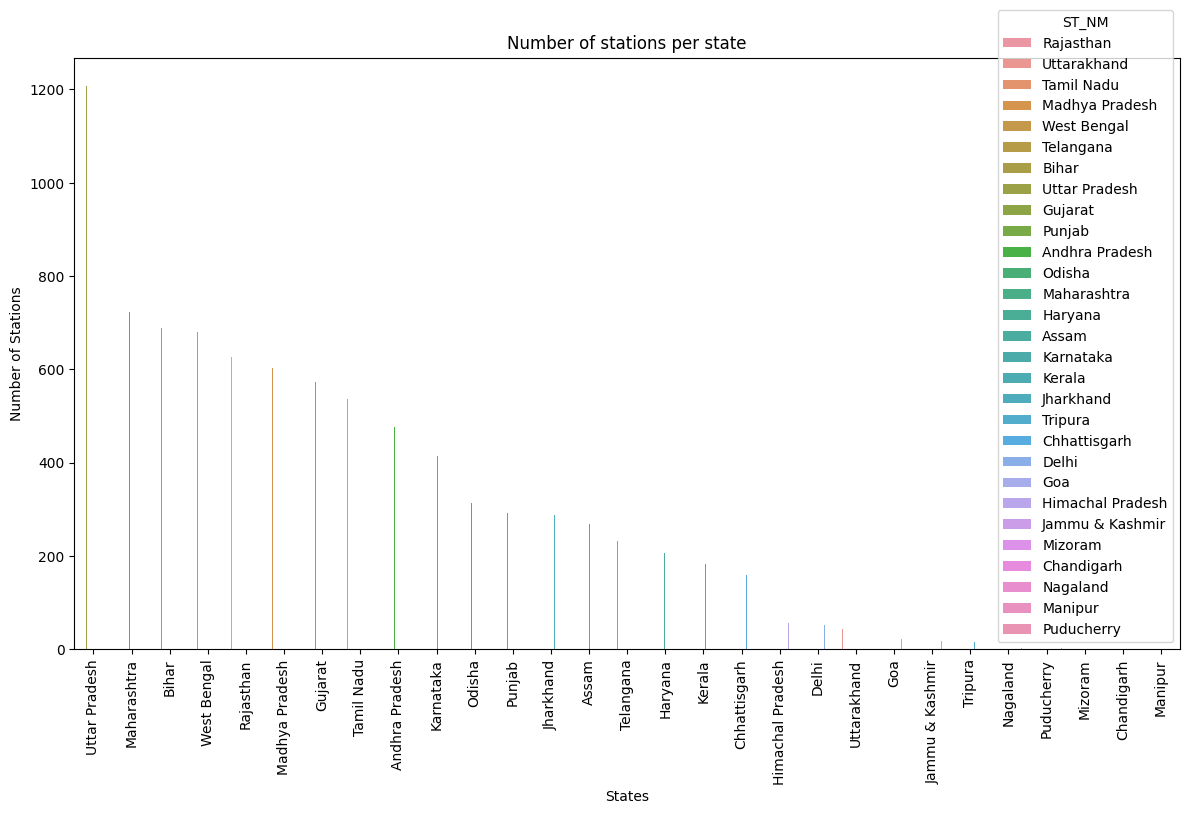

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_stations, x='ST_NM', hue='ST_NM', order=station_count.index)
plt.xlabel('States')
plt.ylabel('Number of Stations')
plt.title('Number of stations per state')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Uttar Pradesh has the most number of stations in India.

##### **How many stations are there in each railway zone?**

In [15]:
station_count = df_stations['zone'].value_counts()
station_count

zone
NR      587
WR      446
NWR     417
SR      315
SCR     292
SWR     289
NER     259
NFR     256
ER      247
ECR     190
WCR     171
CR      159
NCR     156
SECR    144
SER     106
?        98
ECoR     74
KR       63
Name: count, dtype: int64

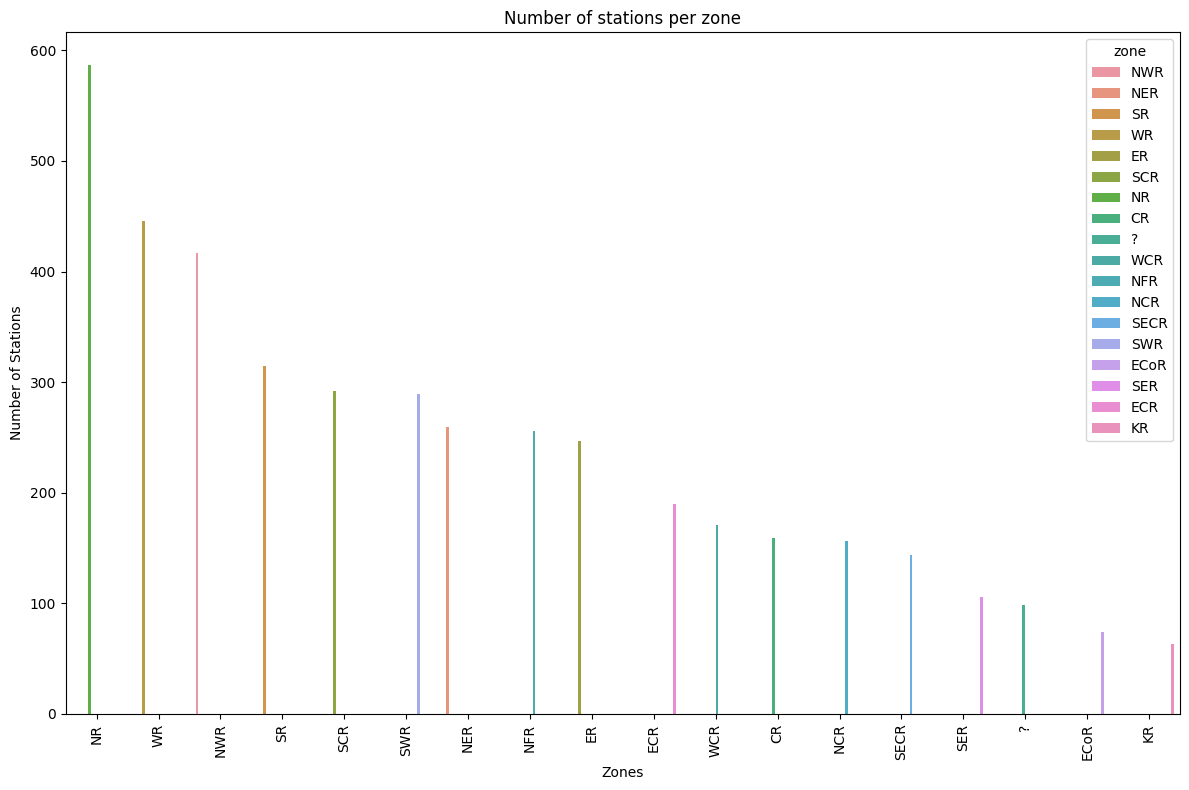

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_stations, x='zone', hue='zone', order=station_count.index)
plt.xlabel('Zones')
plt.ylabel('Number of Stations')
plt.title('Number of stations per zone')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **Which stations have the highest number of train arrivals and departures?**

In [17]:
not_null_arrivals = df_schedules[df_schedules['arrival'] != 'None']
not_null_departure = df_schedules[df_schedules['departure'] != 'None']

In [18]:
station_arrivals = not_null_arrivals.groupby('station_name').size().reset_index(name='arrivals_count')
station_departures = not_null_departure.groupby('station_name').size().reset_index(name='departures_count')

In [19]:
arr = station_arrivals.sort_values(by='arrivals_count', ascending = False).head(10)
dep = station_departures.sort_values(by='departures_count', ascending = False).head(10)

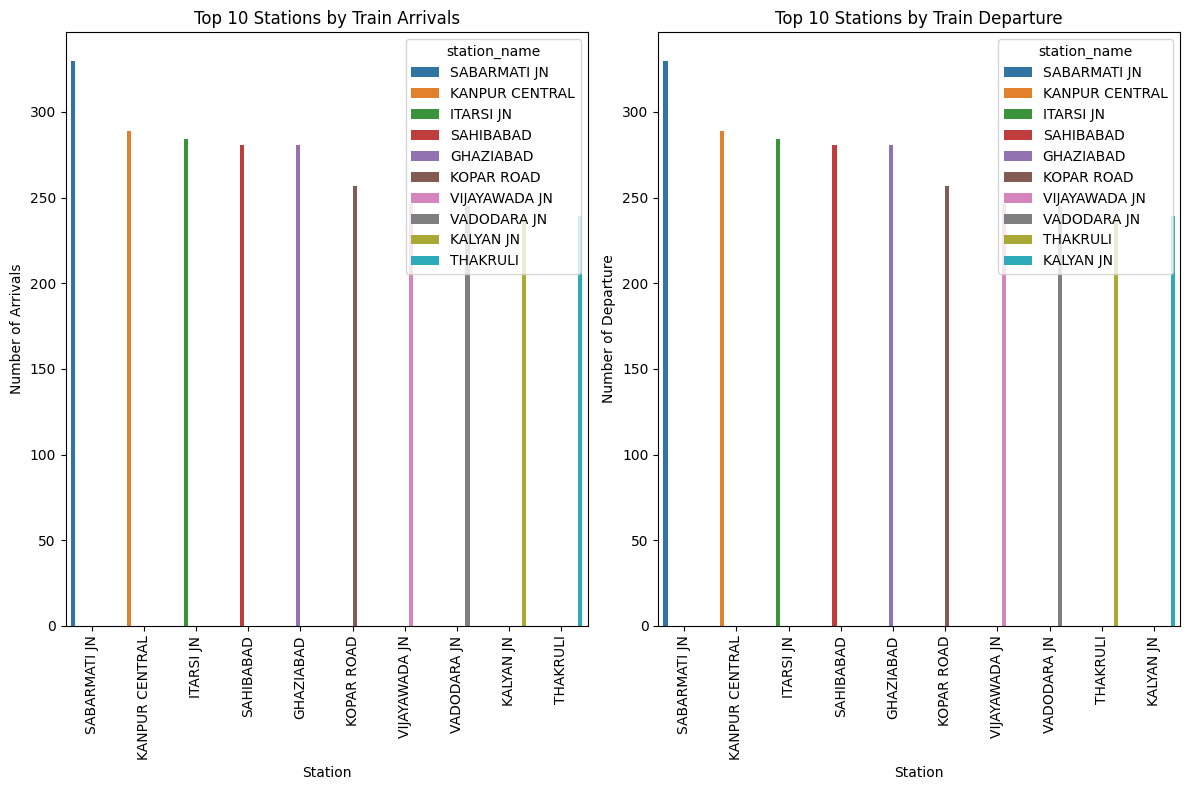

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=arr, x='station_name', y = 'arrivals_count',hue='station_name')
plt.xlabel('Station')
plt.ylabel('Number of Arrivals')
plt.title('Top 10 Stations by Train Arrivals')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.barplot(data=dep, x='station_name', y = 'departures_count',hue='station_name')
plt.xlabel('Station')
plt.ylabel('Number of Departure')
plt.title('Top 10 Stations by Train Departure')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

##### **How many trains offer each class of service (e.g., first class, second AC, sleeper, etc.)?**

In [21]:
classes = ['chair_car','sleeper','third_ac','second_ac','first_class','first_ac']

In [22]:
for i in classes:
    print(f'Number of trains having {i} : {trains_gdf[trains_gdf[i] == 1].shape[0]}')

Number of trains having chair_car : 403
Number of trains having sleeper : 1759
Number of trains having third_ac : 1650
Number of trains having second_ac : 1417
Number of trains having first_class : 167
Number of trains having first_ac : 439


##### **What are the different types of trains available?**

In [23]:
types = trains_gdf['type'].value_counts()

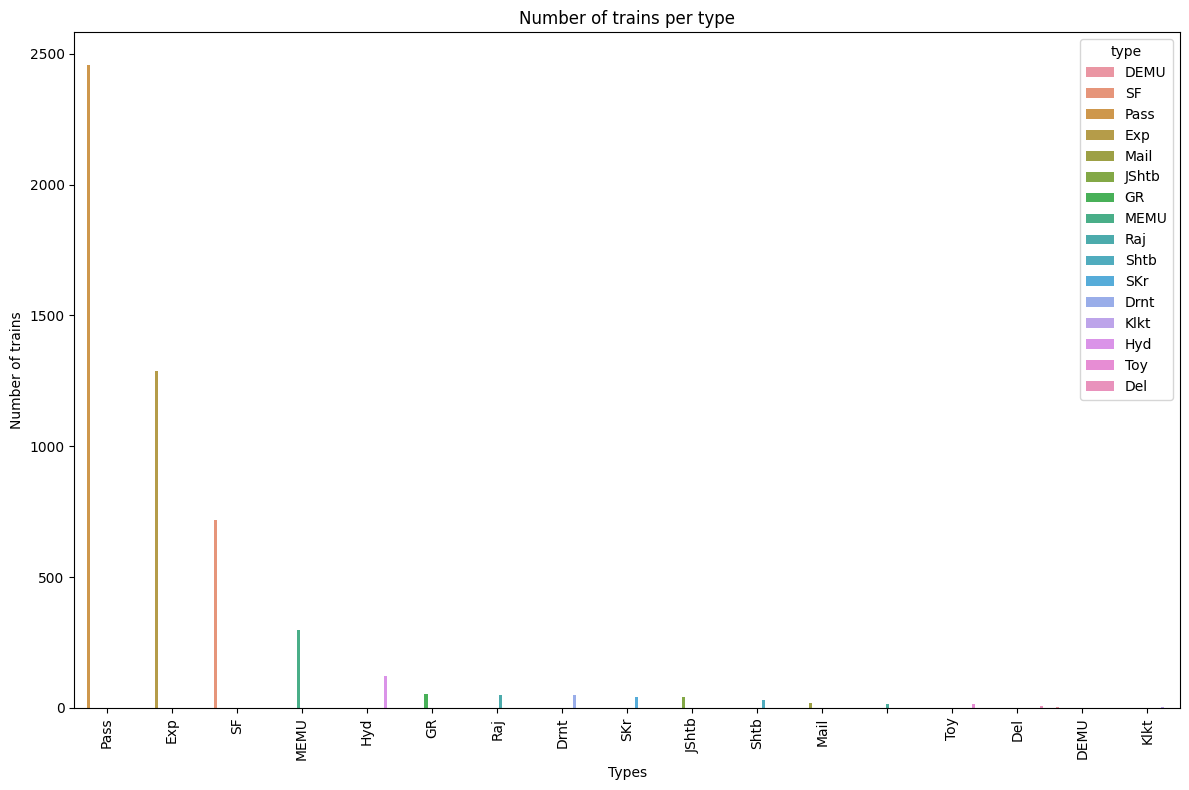

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(data=trains_gdf, x='type', hue='type', order=types.index)
plt.xlabel('Types')
plt.ylabel('Number of trains')
plt.title('Number of trains per type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **Which stations serve the most trains?**

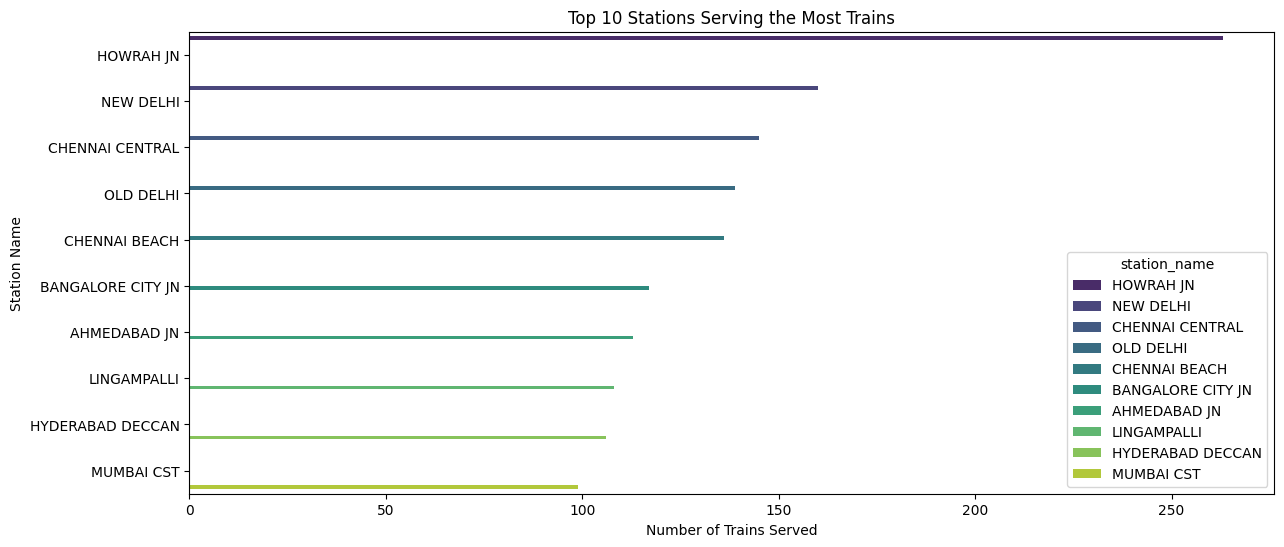

In [25]:
departures = trains_gdf['from_station_name'].value_counts().reset_index(name='departures_count')
departures.rename(columns={'from_station_name': 'station_name'}, inplace=True)

arrivals = trains_gdf['to_station_name'].value_counts().reset_index(name='arrivals_count')
arrivals.rename(columns={'to_station_name': 'station_name'}, inplace=True)

station_counts = pd.merge(departures, arrivals, on='station_name',how='outer').fillna(0)

station_counts['total_trains'] = station_counts['departures_count'] + station_counts['arrivals_count']

top_stations = station_counts.sort_values(by='total_trains', ascending=False)

# Plot the top 10 stations serving the most trains
top_10_stations = top_stations.head(10)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_stations, x='total_trains', y='station_name',hue = 'station_name',palette='viridis')
plt.title('Top 10 Stations Serving the Most Trains')
plt.xlabel('Number of Trains Served')
plt.ylabel('Station Name')
plt.show()

##### **What are the most common routes (from_station_code to to_station_code)?**

In [26]:
routes = trains_gdf.groupby(['from_station_code','to_station_code']).size().reset_index(name='count')
most_common_routes = routes.sort_values(by='count', ascending=False)
most_common_routes.head(10)

,from_station_code,to_station_code,count
2225,MSB,VLCY,70
1965,LPI,FM,30
2222,MSB,TBM,29
1135,FM,LPI,28
1463,HYB,LPI,26
1966,LPI,HYB,23
1433,HWH,PKU,21
2569,PKU,HWH,16
2219,MSB,CGL,14
1174,GAYA,PNBE,9


In [27]:
most_common_routes['route'] = most_common_routes['from_station_code'] + ' to ' + most_common_routes['to_station_code']
most_common_routes = most_common_routes.head(10)

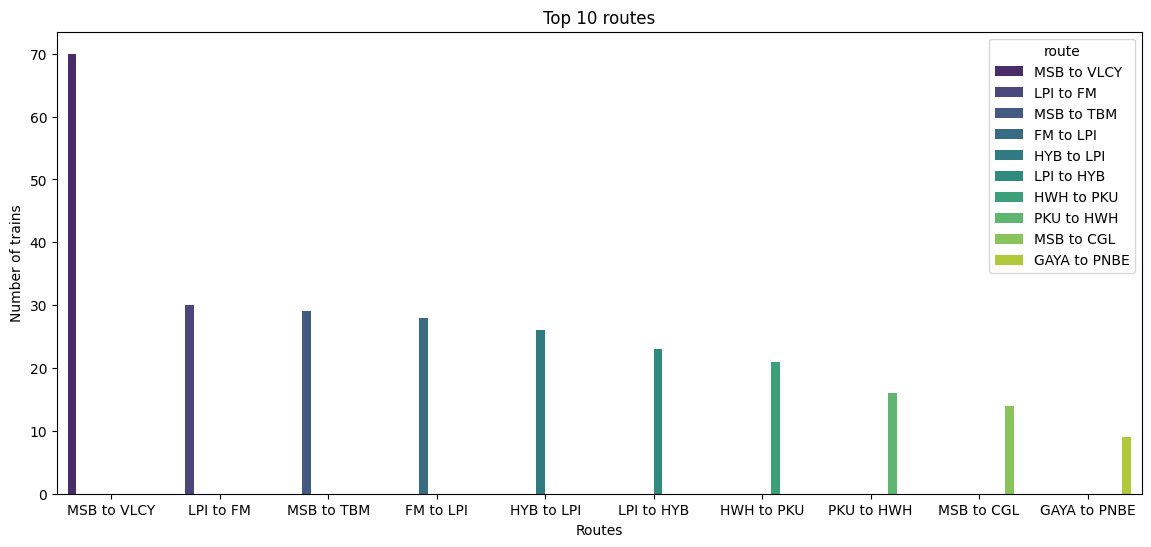

In [28]:
plt.figure(figsize=(14, 6))
sns.barplot(data=most_common_routes, x='route', y = 'count',hue = 'route',palette='viridis')
plt.title('Top 10 routes')
plt.xlabel('Routes')
plt.ylabel('Number of trains')
plt.show()

# **GEO VISUALISATION**

In [29]:
import plotly.graph_objects as go


##### **Stations**

In [30]:

def process_polygon(boundaries_gdf):
    boundary_lines = []
    
    for idx, row in boundaries_gdf.iterrows():
        geom = row['geometry']
        if geom.geom_type == 'Polygon':
            boundary_lines.append(go.Scattermapbox(
            mode="lines",
            lon=[coord[0] for coord in geom.exterior.coords],
            lat=[coord[1] for coord in geom.exterior.coords],
            name='ST_NM',
            showlegend=False,
            line=dict(color='black'),
        ))
        if geom.geom_type == 'MultiPolygon':
            for poly in geom.geoms:
                boundary_lines.append(go.Scattermapbox(
                mode="lines",
                lon=[coord[0] for coord in poly.exterior.coords],
                lat=[coord[1] for coord in poly.exterior.coords],
                name='ST_NM',
                showlegend=False,
                line=dict(color='black'),

                ))
    return boundary_lines

In [31]:
def process_station_points(stations_gdf):
    station_points = go.Scattermapbox(
        mode="markers",
        lon=stations_gdf.geometry.x,
        lat=stations_gdf.geometry.y,
        marker=dict(size=4, color='blue'),
        text=stations_gdf['name'],
        name='name',
        showlegend=False
    )
    
    return station_points

In [32]:
def plot_stations(stations_gdf, state_name=None):
    
    clat = 24
    clon = 80
    zoom = 4
    title = 'India'
    
    boundaries_gdf = states_ind
    
    if state_name:
        all_states = list(states_ind['ST_NM'].unique())
        
        if state_name in all_states:
            boundaries_gdf = states_ind[states_ind['ST_NM'] == state_name]
            stations_gdf = stations_gdf[stations_gdf['ST_NM'] == state_name]
            
            clat = stations_gdf.geometry.y.mean()
            clon = stations_gdf.geometry.x.mean()
            zoom = 6
            title = state_name
        else:
            return '`state_name` not matching with the records.'

    boundary_lines = process_polygon(boundaries_gdf)
    station_points = process_station_points(stations_gdf)
    
    fig = go.Figure(boundary_lines + [station_points])

    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox=dict(
            center=dict(lat=clat, lon=clon),
            zoom=6
        ),
        title=title,
        margin={"r":0,"t":40,"l":0,"b":0},
    )

    fig.show()
    
plot_stations(df_stations,'West Bengal')

# **OBSERVATION**

- Uttar Pradesh has the most number of stations
- Most stations are served by Northen Railway
- Passenger train type is the most common train types.
- Howrah Junction serves most trains based on Arrival and departure
- MSB is the most common from station
- VLCY is the most common to station